# UCB Driver Coupon Analysis

## Assignment Instructions

For detailed assignment instructions, data description, and analysis problems, please refer to:
**[Assignment Instructions](docs/assignment-instructions.md)**

This notebook contains the implementation and analysis code for the coupon acceptance study.

In [1]:
## print("Hello World!") #!/usr/bin/env python3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import src.helpers as helpers

# Apply Solarized theme across all visualization libraries
helpers.apply_solarized_theme()

## Data Loading and Initial Exploration

Refer to [Assignment Instructions](docs/assignment-instructions.md) for detailed problem descriptions.

### 1. Read in the data

In [2]:
data = pd.read_csv('data/coupons.csv')

# Validate data quality
validation_report = helpers.validate_dataframe(data)
print("Data Validation Summary:")
print(f"  Total rows: {validation_report['summary']['total_rows']}")
print(f"  Total columns: {validation_report['summary']['total_columns']}")
print(f"  Duplicate rows: {validation_report['summary']['duplicate_rows']}")
print(f"  Memory usage: {validation_report['summary']['memory_usage_mb']:.2f} MB")

if validation_report['warnings']:
    print("\nWarnings:")
    for w in validation_report['warnings']:
        print(f"  - {w}")

data.head(5)

Data Validation Summary:
  Total rows: 12684
  Total columns: 26
  Duplicate rows: 74
  Memory usage: 12.85 MB

Warnings:
  - Column 'car' has 99.1% missing values


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### 2. Investigate the dataset for missing or problematic data

In [3]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
rows = data.shape[0]
columns = data.shape[1]
#import importlib
#import src.helpers
#help(helpers.draw_bar_plot_column_null_values)

helpers.draw_bar_plot_column_null_values(data_frame=data, save_path='images/missing_values.png')

In [6]:
data.car.value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

### 3. Explore the data for null records and operate on them

In [7]:
data.drop(columns=['car'], inplace=True)

helpers.draw_bar_plot_column_null_values(data_frame=data, save_path='images/missing_values_after_dropping_car.png')

### 4. Proportion of observations that accepted coupons

*Implementation needed - see assignment instructions for details*

In [8]:
accept_summary = data.groupby('Y').size().reset_index(name='counts')
fig = px.pie(accept_summary, names='Y', values='counts', title='How many coupons were accepted vs. not accepted')
fig.show()



In [9]:
coupon_summary = data.groupby('coupon').size().reset_index(name='counts')
#fig = px.bar(coupon_summary, x='coupon', y='counts', title='Coupon Distribution by Type', labels={'coupon': 'Coupon Type', 'counts': 'Number of Records'})
fig = px.bar_polar(coupon_summary, r='counts', theta='coupon', title='Coupon Distribution by Type', labels={'coupon': 'Coupon Type', 'counts': 'Number of Records'}, color='counts', color_continuous_scale=px.colors.sequential.Tealgrn)
fig.write_image('images/coupon_counts_by_type_bar_polar.png')
fig.show()

In [10]:
df = data[['temperature', 'has_children', 'direction_same', 'direction_opp', 'Y']]
df.corr()

,temperature,has_children,direction_same,direction_opp,Y
temperature,1.000000,-0.019716,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,-0.031620,0.031620,-0.045557
direction_same,0.097085,-0.031620,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,-1.000000,1.000000,-0.014570
Y,0.061240,-0.045557,0.014570,-0.014570,1.000000


### 4.a Convert text (enum) values to numeric to find a correlation map

In [11]:
numeric_df, mappings = helpers.convert_categorical_to_numeric(data)
mappings

{'destination': {'No Urgent Place': 1, 'Home': 2, 'Work': 3},
 'passanger': {'Alone': 1, 'Friend(s)': 2, 'Partner': 3, 'Kid(s)': 4},
 'weather': {'Sunny': 1, 'Snowy': 2, 'Rainy': 3},
 'time': {'6PM': 1, '7AM': 2, '10AM': 3, '2PM': 4, '10PM': 5},
 'coupon': {'Coffee House': 1,
  'Restaurant(<20)': 2,
  'Carry out & Take away': 3,
  'Bar': 4,
  'Restaurant(20-50)': 5},
 'expiration': {'1d': 1, '2h': 2},
 'gender': {'Female': 1, 'Male': 2},
 'age': {'21': 1,
  '26': 2,
  '31': 3,
  '50plus': 4,
  '36': 5,
  '41': 6,
  '46': 7,
  'below21': 8},
 'maritalStatus': {'Married partner': 1,
  'Single': 2,
  'Unmarried partner': 3,
  'Divorced': 4,
  'Widowed': 5},
 'education': {'Some college - no degree': 1,
  'Bachelors degree': 2,
  'Graduate degree (Masters or Doctorate)': 3,
  'Associates degree': 4,
  'High School Graduate': 5,
  'Some High School': 6},
 'occupation': {'Unemployed': 1,
  'Student': 2,
  'Computer & Mathematical': 3,
  'Sales & Related': 4,
  'Education&Training&Library': 5

In [12]:
numeric_df.corr()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
destination,1.000000,-0.558556,0.106435,-0.134751,-0.381406,0.117994,-0.067697,-0.002871,-0.012043,0.024601,...,0.015181,0.000721,-0.005708,0.006771,NaN,0.026947,0.414993,0.433947,-0.433947,-0.119311
passanger,-0.558556,1.000000,-0.078300,0.066040,0.226892,0.014848,0.072109,-0.038311,0.049969,-0.131156,...,-0.026098,-0.021091,-0.015330,-0.026533,NaN,0.121877,-0.217041,-0.286984,0.286984,0.036345
weather,0.106435,-0.078300,1.000000,-0.434497,0.068345,0.111445,-0.017702,0.027003,0.015781,0.010187,...,0.016374,0.035439,-0.007897,-0.006447,NaN,0.121698,0.202572,-0.017712,0.017712,-0.098800
temperature,-0.134751,0.066040,-0.434497,1.000000,-0.106854,-0.142489,0.124090,-0.025504,-0.025559,0.018055,...,-0.013964,-0.031635,0.013813,0.014617,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
time,-0.381406,0.226892,0.068345,-0.106854,1.000000,0.040806,-0.004884,0.001065,0.009641,-0.000423,...,0.006031,0.008757,-0.002418,-0.001936,NaN,0.075805,-0.108282,-0.216510,0.216510,0.005892
coupon,0.117994,0.014848,0.111445,-0.142489,0.040806,1.000000,-0.207902,0.000518,0.021064,-0.015986,...,0.008744,0.016056,-0.005951,-0.013563,NaN,0.124398,0.088273,0.024315,-0.024315,-0.061538
expiration,-0.067697,0.072109,-0.017702,0.124090,-0.004884,-0.207902,1.000000,-0.001264,0.006603,-0.021294,...,-0.007321,-0.001318,-0.003818,-0.003579,NaN,0.042740,-0.032977,0.033584,-0.033584,-0.129920
gender,-0.002871,-0.038311,0.027003,-0.025504,0.001065,0.000518,-0.001264,1.000000,-0.020596,-0.040501,...,0.053615,-0.014544,0.031177,0.013428,NaN,-0.007028,0.002743,-0.004496,0.004496,0.043969
age,-0.012043,0.049969,0.015781,-0.025559,0.009641,0.021064,0.006603,-0.020596,1.000000,-0.070822,...,0.005342,0.028921,-0.006353,-0.045907,NaN,0.027290,-0.004622,-0.007767,0.007767,-0.016235
maritalStatus,0.024601,-0.131156,0.010187,0.018055,-0.000423,-0.015986,-0.021294,-0.040501,-0.070822,1.000000,...,0.032908,-0.031722,0.010198,0.045011,NaN,-0.034704,0.009361,0.022836,-0.022836,0.006716


In [13]:
#numeric_df.columns.tolist()
#sns.pairplot(numeric_df, hue='Y', vars=['destination', 'passanger', 'weather', 'temperature', 'time', 'Y'])
#px.scatter_matrix(numeric_df, dimensions=['destination', 'passanger', 'weather', 'temperature', 'time'], color='Y', title='Scatter Matrix of Numeric Features Colored by Coupon Acceptance')
#px.scatter(data, x='temperature', y='passanger', color='coupon', size='Y', title='Temperature vs Time Colored by Coupon Acceptance')
#numeric_df.groupby('Y')[['temperature', 'weather']].sum() / numeric_df.groupby('Y')[['temperature', 'weather']].count()
numeric_df.groupby('Y')[['passanger', 'destination']].describe()


passanger                                              destination  \
      count      mean       std  min  25%  50%  75%  max       count   
Y                                                                      
0    5474.0  1.628608  0.968720  1.0  1.0  1.0  2.0  4.0      5474.0   
1    7210.0  1.696949  0.900889  1.0  1.0  1.0  2.0  4.0      7210.0   

                                                
       mean       std  min  25%  50%  75%  max  
Y                                               
0  1.867373  0.831030  1.0  1.0  2.0  3.0  3.0  
1  1.668100  0.814009  1.0  1.0  1.0  2.0  3.0

### 5. Bar plot visualization of coupon column

This is a univariate analysis of variables to understand their distributions. 

In [14]:
px.bar(coupon_summary, x='coupon', y='counts', title='Coupon Distribution', labels={'coupon': 'Coupon Type', 'counts': 'Number of Records'})


#### Distribution by Age

In [15]:
## pd.crosstab does something similar to below steps

#age_summary = data.groupby('age')[['age', 'Y']].size().reset_index(name='counts')
#age_summary_accepted = data[data['Y'] == 1].groupby('age')[['age', 'Y']].size().reset_index(name='counts')
#age_summary_declined = data[data['Y'] == 0].groupby('age')[['age', 'Y']].size().reset_index(name='counts')

#age_summary_accepted.set_index('age', inplace=True)
#age_summary_declined.set_index('age', inplace=True)

#age_summary_combined = age_summary_accepted.join(age_summary_declined, lsuffix='_accepted', rsuffix='_declined', how='inner').fillna(0).reset_index()
#age_summary_combined


age_summary = pd.crosstab(data['age'], data['Y'])
age_summary.columns = ['declined', 'accepted']
age_summary = age_summary.reset_index()
age_summary['acceptance_ratio'] = age_summary['accepted'] / (age_summary['declined'] + age_summary['accepted'])

print(age_summary)

fig = px.bar(age_summary, x='age', y=['declined', 'accepted'], title='Coupon Acceptance by Age Group', labels={'value': 'Number of Records', 'age': 'Age Group', 'variable': 'Coupon Acceptance'})
fig.update_layout(barmode='group', xaxis={'categoryorder':'array', 'categoryarray': ['below21', '21', '26', '31', '36', '41', '46', '50plus']})
fig.write_image('images/coupon_acceptance_by_age_group.png')
fig.show()


       age  declined  accepted  acceptance_ratio
0       21      1066      1587          0.598191
1       26      1034      1525          0.595936
2       31       925      1114          0.546346
3       36       613       706          0.535254
4       41       467       626          0.572736
5       46       291       395          0.575802
6   50plus       878       910          0.508949
7  below21       200       347          0.634369


The acceptance ratio of coupons is higher at a younger age and seems to slightly taper off as working adults are likely prioritizing their time over money saved before it seems to pick up again. 

### 6. Histogram of temperature column

As a proportion of temperature, the acceptance ratio of coupons seems to be higher at higher temperatures outside usually indicative of summer. This is a bivariate analysis of variables. 

Text(0.5, 1.0, 'Temperature Distribution by Coupon Acceptance')

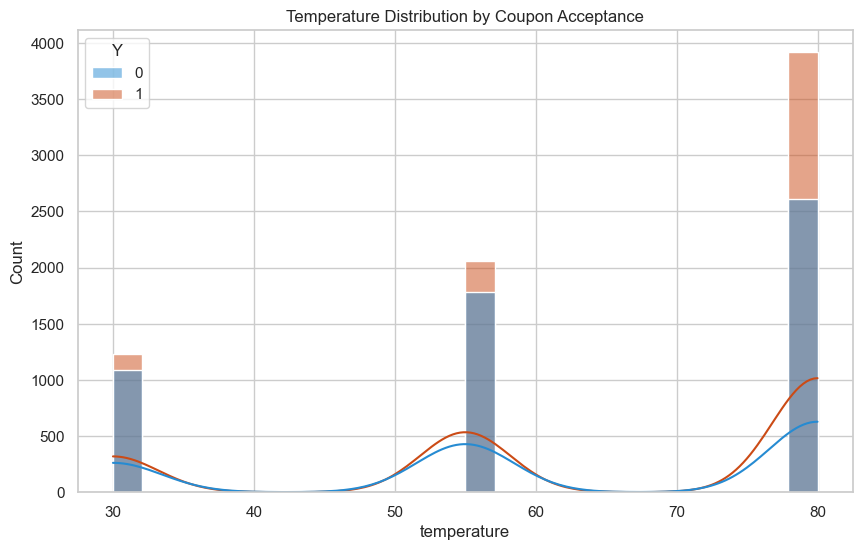

In [16]:
sns.histplot(data=numeric_df, x='temperature', hue='Y', kde=True)
plt.title('Temperature Distribution by Coupon Acceptance')

## Bar Coupons Investigation

*Refer to [Assignment Instructions](docs/assignment-instructions.md) for detailed analysis steps*

### Analysis Steps 1-7

*Implementation needed for each step outlined in the assignment instructions*


1. Create a new `DataFrame` that contains just the bar coupons.

In [17]:
bar_df = data[data['coupon'] == 'Bar'].copy()
bar_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   1996 non-null   object
 15  CoffeeHouse           1978 non-null   obje

2. What proportion of bar coupons were accepted?

In [18]:
bar_df_count = bar_df.shape[0]
bar_df_accepted_count = bar_df[bar_df['Y'] == 1].count()['Y']
bar_coupon_percent_accepted = (bar_df_accepted_count / bar_df_count) * 100
print(f"Total 'Bar' coupon records: {bar_df_count}")
print(f"'Bar' coupon accepted records: {bar_df_accepted_count}")
print(f"'Bar' coupon acceptance percentage: {bar_coupon_percent_accepted:.2f}%")

Total 'Bar' coupon records: 2017
'Bar' coupon accepted records: 827
'Bar' coupon acceptance percentage: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [19]:
#print(bar_df['Bar'].value_counts())
bar_df['VisitedBar3TimesOrLessPerMonth'] = bar_df['Bar'].apply(lambda x: 'LessThan3Times' if x in ['never', 'less1', '1~3'] else 'MoreThan3Times')
bar_df_accepted_percentage = pd.crosstab(bar_df['VisitedBar3TimesOrLessPerMonth'], bar_df['Y'], normalize='index', margins=True)*100
    
print(bar_df_accepted_percentage)

for group in ['LessThan3Times', 'MoreThan3Times']:
    group_data = bar_df[bar_df['VisitedBar3TimesOrLessPerMonth'] == group]
    accepted = len(group_data[group_data['Y'] == 1])
    total = len(group_data)
    percentage = (accepted / total * 100) if total > 0 else 0
    
    print(f"\nTotal Bar Coupons Accepted by Those Who Go to the Bar {group}: {accepted}")
    print(f"Total Bar Coupons for Those Who Go to the Bar {group}: {total}")
    print(f"Percentage Accepted: {percentage:.2f}%")

Y                                       0          1
VisitedBar3TimesOrLessPerMonth                      
LessThan3Times                  62.938230  37.061770
MoreThan3Times                  26.818182  73.181818
All                             58.998513  41.001487

Total Bar Coupons Accepted by Those Who Go to the Bar LessThan3Times: 666
Total Bar Coupons for Those Who Go to the Bar LessThan3Times: 1797
Percentage Accepted: 37.06%

Total Bar Coupons Accepted by Those Who Go to the Bar MoreThan3Times: 161
Total Bar Coupons for Those Who Go to the Bar MoreThan3Times: 220
Percentage Accepted: 73.18%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [20]:
bar_df_over_25 = bar_df[bar_df['age'].isin(['26', '31', '36', '41', '46', '50plus'])]
print(bar_df_over_25.groupby('Bar')[['age']].value_counts())

target_group = bar_df_over_25[bar_df_over_25['Bar'].isin(['1~3', '4~8', 'gt8'])]

is_target_group = (
    (bar_df['age'].isin(['26', '31', '36', '41', '46', '50plus'])) & 
    (bar_df['Bar'].isin(['1~3', '4~8', 'gt8']))
)

group_labels = is_target_group.map({
    True: 'Bar >1x/month & Age >25',
    False: 'All Others'
})

acceptance_rates = pd.crosstab(group_labels, bar_df['Y'], normalize='index') * 100

print("Acceptance Rates by Group:")
print(acceptance_rates)
print("\n" + "="*60)

detailed = bar_df.groupby(is_target_group)['Y'].agg(['sum', 'count', 'mean'])
detailed.index = ['All Others', 'Bar >1x/month & Age >25']
detailed.columns = ['Accepted', 'Total', 'Acceptance Rate']
detailed['Acceptance Rate'] = detailed['Acceptance Rate'] * 100

print("\nDetailed Statistics:")
print(detailed)

rate_target = detailed.loc['Bar >1x/month & Age >25', 'Acceptance Rate']
rate_others = detailed.loc['All Others', 'Acceptance Rate']
rate_diff = rate_target - rate_others

#FINAL OUTPUT
print(f"\n{'='*60}")
print(f"Acceptance Rate Difference: {rate_diff:+.2f} percentage points")
print(f"\nConclusion: The group that goes to bars >1x/month and is over 25")
print(f"has a {'HIGHER' if rate_diff > 0 else 'LOWER'} acceptance rate")
print(f"({rate_target:.2f}% vs {rate_others:.2f}%)")


Bar    age   
1~3    26         96
       31         71
       50plus     52
       36         28
       41         28
       46          9
4~8    26         55
       31         16
       36         12
       50plus     12
       46          7
       41          4
gt8    26         18
       31          9
       50plus      3
less1  31        114
       41         88
       26         83
       36         79
       50plus     54
       46         32
never  50plus    160
       26        140
       31        124
       36         87
       46         61
       41         51
Name: count, dtype: int64
Acceptance Rates by Group:
Y                                0          1
row_0                                        
All Others               66.499687  33.500313
Bar >1x/month & Age >25  30.476190  69.523810


Detailed Statistics:
                         Accepted  Total  Acceptance Rate
All Others                    535   1597        33.500313
Bar >1x/month & Age >25       292    420   

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [21]:
print("Passenger types:", bar_df['passanger'].unique())
print("\nOccupations:", bar_df['occupation'].unique())

bar_df_frequent = bar_df[bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])].copy()

bar_df_no_kids = bar_df_frequent[bar_df_frequent['passanger'] != 'Kid(s)'].copy()

target_group = bar_df_no_kids[
    ~bar_df_no_kids['occupation'].isin(['Farming Fishing & Forestry'])
].copy()

is_target_group = (
    (bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_df['passanger'] != 'Kid(s)') &
    (~bar_df['occupation'].isin(['Farming Fishing & Forestry']))
)

group_labels = is_target_group.map({
    True: 'Bar >1x/month & No Kids & Non-Farming',
    False: 'All Others'
})


acceptance_rates = pd.crosstab(group_labels, bar_df['Y'], normalize='index') * 100

print("Acceptance Rates by Group:")
print(acceptance_rates)
print("\n" + "="*60)

detailed = bar_df.groupby(is_target_group)['Y'].agg(['sum', 'count', 'mean'])
detailed.index = ['All Others', 'Bar >1x/month & No Kids & Non-Farming']
detailed.columns = ['Accepted', 'Total', 'Acceptance Rate']
detailed['Acceptance Rate'] = detailed['Acceptance Rate'] * 100

print("\nDetailed Statistics:")
print(detailed)


rate_target = detailed.loc['Bar >1x/month & No Kids & Non-Farming', 'Acceptance Rate']
rate_others = detailed.loc['All Others', 'Acceptance Rate']
rate_diff = rate_target - rate_others

#FINAL OUTPUT
print(f"\n{'='*60}")
print(f"Acceptance Rate Difference: {rate_diff:+.2f} percentage points")
print(f"\nConclusion: The group that goes to bars >1x/month, has no kid passengers,")
print(f"and works in non-farming occupations has a {'HIGHER' if rate_diff > 0 else 'LOWER'} acceptance rate")
print(f"({rate_target:.2f}% vs {rate_others:.2f}%)")


Passenger types: ['Kid(s)' 'Alone' 'Friend(s)' 'Partner']

Occupations: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']
Acceptance Rates by Group:
Y                                              0          1
row_0                                                      
All Others                             70.395634  29.604366
Bar >1x/month & No Kids & Non-Farming  28.675136  7

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

In [22]:
# Check column names and unique values

print(data['Bar'].value_counts())
print("Age values:", data.query("Bar != 'never'")['age'].value_counts())
print("\nIncome values:", data['income'].value_counts())
print("\nMarital Status:", data['maritalStatus'].value_counts())
print("\nCheap Restaurant:", data['RestaurantLessThan20'].value_counts())




Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
Age values: age
21         1804
26         1685
31         1292
36          784
50plus      758
41          747
46          286
below21     131
Name: count, dtype: int64

Income values: income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

Marital Status: maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64

Cheap Restaurant: RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64


In [23]:
# Condition 1: Bar >1x/month AND No kids AND Not widowed
condition_bar_once_no_kids_not_widowed = (
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (data['passanger'] != 'Kid(s)') &
    (data['maritalStatus'] != 'Widowed')
)

# Condition 2: Bar >1x/month AND Age < 30
condition_bar_once_age_less_30 = (
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (data['age'].isin(['below21', '21', '26']))
)

# Condition 3: Cheap restaurants >4x/month AND Income < 50K
condition_cheap_restaurants_income_less_50k = (
    (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
)

is_target_group = condition_bar_once_no_kids_not_widowed | condition_bar_once_age_less_30 | condition_cheap_restaurants_income_less_50k

group_labels = is_target_group.map({
    True: 'Meets Any Condition',
    False: 'All Others'
})

acceptance_rates = pd.crosstab(group_labels, data['Y'], normalize='index') * 100

print("Acceptance Rates by Group:")
print(acceptance_rates)
print("\n" + "="*60)

detailed = data.groupby(is_target_group)['Y'].agg(['sum', 'count', 'mean'])
detailed.index = ['All Others', 'Meets Any Condition']
detailed.columns = ['Accepted', 'Total', 'Acceptance Rate']
detailed['Acceptance Rate'] = detailed['Acceptance Rate'] * 100

print("\nDetailed Statistics:")
print(detailed)

# Show breakdown by each individual condition
print("\n" + "="*60)
print("Breakdown by Individual Conditions:")
print(f"Condition 1 (Bar >1x/month, No kids, Not widowed): {condition_bar_once_no_kids_not_widowed.sum()} drivers")
print(f"Condition 2 (Bar >1x/month, Age <30): {condition_bar_once_age_less_30.sum()} drivers")
print(f"Condition 3 (Cheap restaurants >4x/month, Income <50K): {condition_cheap_restaurants_income_less_50k.sum()} drivers")
print(f"Total meeting ANY condition: {is_target_group.sum()} drivers")

rate_target = detailed.loc['Meets Any Condition', 'Acceptance Rate']
rate_others = detailed.loc['All Others', 'Acceptance Rate']
rate_diff = rate_target - rate_others

#FINAL OUTPUT
print(f"\n{'='*60}")
print(f"Acceptance Rate Difference: {rate_diff:+.2f} percentage points")
print(f"\nConclusion: The group meeting ANY of the three conditions")
print(f"has a {'HIGHER' if rate_diff > 0 else 'LOWER'} acceptance rate")
print(f"({rate_target:.2f}% vs {rate_others:.2f}%)")

Acceptance Rates by Group:
Y                            0          1
row_0                                    
All Others           45.685077  54.314923
Meets Any Condition  39.460404  60.539596


Detailed Statistics:
                     Accepted  Total  Acceptance Rate
All Others               4091   7532        54.314923
Meets Any Condition      3119   5152        60.539596

Breakdown by Individual Conditions:
Condition 1 (Bar >1x/month, No kids, Not widowed): 3696 drivers
Condition 2 (Bar >1x/month, Age <30): 2272 drivers
Condition 3 (Cheap restaurants >4x/month, Income <50K): 2279 drivers
Total meeting ANY condition: 5152 drivers

Acceptance Rate Difference: +6.22 percentage points

Conclusion: The group meeting ANY of the three conditions
has a HIGHER acceptance rate
(60.54% vs 54.31%)


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Observations from the Bar Coupons Investigation:

1. Overall acceptance rate: 41% of bar coupons were accepted
2. Bar visit frequency matters significantly:
- Drivers who visit bars ≤3 times/month: 37.06% acceptance rate
- Drivers who visit bars >3 times/month: 73.18% acceptance rate
- Age and bar frequency combination:
3. Drivers who go to bars >1x/month AND are over 25: 69.52% acceptance rate
- All others: 33.50% acceptance rate
- Social and occupational factors:
4. Drivers who go to bars >1x/month, have no kid passengers, and work in non-farming occupations: 71.32% acceptance rate
- All others: 29.60% acceptance rate
5. Multiple lifestyle factors:
- Drivers meeting any of these conditions had higher acceptance (60.54% vs 54.31%):
    - Go to bars >1x/month, no kid passengers, not widowed
    - Go to bars >1x/month and under 30
    - Go to cheap restaurants >4x/month with income <$50K

### Hypothesis

Based on these observations, I hypothesize that drivers who accepted bar coupons are characterized by a social, leisure-oriented lifestyle with fewer family constraints. Specifically:

#### Primary Characteristics:
1. Regular bar patrons: They already have an established pattern of visiting bars (>1x/month), making them more likely to accept additional bar opportunities
2. Social freedom: They tend to travel without children as passengers, suggesting more flexibility in their social activities
3. Age-related social patterns:
    - Younger drivers (<30) who are establishing social habits
    - Older drivers (>25) who visit bars regularly, indicating sustained social engagement
4. Economic accessibility: Those with moderate incomes who frequent affordable dining options show willingness to accept value-oriented offers

#### Supporting Behavioral Patterns:
- Lifestyle consistency: Their existing bar-going behavior predicts future acceptance
- Social mobility: Not being widowed and not having farming occupations suggests more urban, socially active lifestyles
- Value-seeking behavior: Those who frequent cheap restaurants show price sensitivity that aligns with coupon usage

#### Core Insight:

The strongest predictor of bar coupon acceptance is existing bar-going behavior combined with social flexibility (no kids, appropriate age demographics, non-restrictive occupations). This suggests that bar coupons are most effective when targeting people who already have the lifestyle and freedom to take advantage of such offers, rather than trying to convert non-bar-goers.

## Independent Investigation

*Refer to [Assignment Instructions](docs/assignment-instructions.md) for guidance on exploring other coupon groups*

In [24]:

print("ACCEPTANCE RATES BY DESTINATION")


# Crosstab with counts
dest_counts = pd.crosstab(data['destination'], data['Y'], margins=True)
print("\nCounts:")
print(dest_counts)

# Acceptance rates
dest_rates = pd.crosstab(data['destination'], data['Y'], normalize='index') * 100
print("\nAcceptance Rates (%):")
print(dest_rates)


dest_stats = data.groupby('destination')['Y'].agg(['sum', 'count', 'mean'])
dest_stats.columns = ['Accepted', 'Total', 'Acceptance Rate']
dest_stats['Acceptance Rate'] = dest_stats['Acceptance Rate'] * 100
dest_stats = dest_stats.sort_values('Acceptance Rate', ascending=False)
print("\nDetailed Statistics (sorted by acceptance rate):")
print(dest_stats)


print("ACCEPTANCE RATES BY PASSENGER TYPE")


# Crosstab with counts
pass_counts = pd.crosstab(data['passanger'], data['Y'], margins=True)
print("\nCounts:")
print(pass_counts)

# Acceptance rates
pass_rates = pd.crosstab(data['passanger'], data['Y'], normalize='index') * 100
print("\nAcceptance Rates (%):")
print(pass_rates)

# Detailed stats
pass_stats = data.groupby('passanger')['Y'].agg(['sum', 'count', 'mean'])
pass_stats.columns = ['Accepted', 'Total', 'Acceptance Rate']
pass_stats['Acceptance Rate'] = pass_stats['Acceptance Rate'] * 100
pass_stats = pass_stats.sort_values('Acceptance Rate', ascending=False)
print("\nDetailed Statistics (sorted by acceptance rate):")
print(pass_stats)


print("ACCEPTANCE RATES BY DIRECTION (Same vs Opposite)")


# Create a combined direction column
df_temp = data.copy()
df_temp['direction'] = df_temp.apply(
    lambda row: 'Same Direction' if row['direction_same'] == 1 else 'Opposite Direction',
    axis=1
)

# Crosstab with counts
dir_counts = pd.crosstab(df_temp['direction'], df_temp['Y'], margins=True)
print("\nCounts:")
print(dir_counts)

# Acceptance rates
dir_rates = pd.crosstab(df_temp['direction'], df_temp['Y'], normalize='index') * 100
print("\nAcceptance Rates (%):")
print(dir_rates)

# Detailed stats
dir_stats = df_temp.groupby('direction')['Y'].agg(['sum', 'count', 'mean'])
dir_stats.columns = ['Accepted', 'Total', 'Acceptance Rate']
dir_stats['Acceptance Rate'] = dir_stats['Acceptance Rate'] * 100
print("\nDetailed Statistics:")
print(dir_stats)

# Calculate difference
same_rate = dir_stats.loc['Same Direction', 'Acceptance Rate']
opp_rate = dir_stats.loc['Opposite Direction', 'Acceptance Rate']
diff = same_rate - opp_rate
print(f"\nDifference: {diff:+.2f} percentage points")
print(f"Same direction has {'HIGHER' if diff > 0 else 'LOWER'} acceptance by {abs(diff):.2f}%")


print("COMBINED ANALYSIS: DESTINATION × PASSENGER")

combined = pd.crosstab(
    [data['destination'], data['passanger']], 
    data['Y'], 
    normalize='index'
) * 100

print("\nAcceptance Rates by Destination and Passenger Type:")
print(combined)


print("COMBINED ANALYSIS: DIRECTION × PASSENGER")


dir_pass = pd.crosstab(
    [df_temp['direction'], data['passanger']], 
    data['Y'], 
    normalize='index'
) * 100

print("\nAcceptance Rates by Direction and Passenger Type:")
print(dir_pass)

ACCEPTANCE RATES BY DESTINATION

Counts:
Y                   0     1    All
destination                       
Home             1598  1639   3237
No Urgent Place  2301  3982   6283
Work             1575  1589   3164
All              5474  7210  12684

Acceptance Rates (%):
Y                        0          1
destination                          
Home             49.366698  50.633302
No Urgent Place  36.622633  63.377367
Work             49.778761  50.221239

Detailed Statistics (sorted by acceptance rate):
                 Accepted  Total  Acceptance Rate
destination                                      
No Urgent Place      3982   6283        63.377367
Home                 1639   3237        50.633302
Work                 1589   3164        50.221239
ACCEPTANCE RATES BY PASSENGER TYPE

Counts:
Y             0     1    All
passanger                   
Alone      3464  3841   7305
Friend(s)  1077  2221   3298
Kid(s)      498   508   1006
Partner     435   640   1075
All        5474  7

In [25]:
dest_stats = data.groupby('destination')['Y'].agg(['mean', 'count']).reset_index()
dest_stats.columns = ['Destination', 'Acceptance Rate', 'Count']
dest_stats['Acceptance Rate'] = dest_stats['Acceptance Rate'] * 100
dest_stats = dest_stats.sort_values('Acceptance Rate')

pass_stats = data.groupby('passanger')['Y'].agg(['mean', 'count']).reset_index()
pass_stats.columns = ['Passenger Type', 'Acceptance Rate', 'Count']
pass_stats['Acceptance Rate'] = pass_stats['Acceptance Rate'] * 100
pass_stats = pass_stats.sort_values('Acceptance Rate')

dir_stats = data.groupby('direction_same')['Y'].agg(['mean', 'count']).reset_index()
dir_stats['Direction'] = dir_stats['direction_same'].map({0: 'Opposite Direction', 1: 'Same Direction'})
dir_stats['Acceptance Rate'] = dir_stats['mean'] * 100
dir_stats['Count'] = dir_stats['count']

# 4. Heatmap data: Destination × Passenger
pivot_dest_pass = pd.crosstab(
    data['destination'], 
    data['passanger'], 
    data['Y'], 
    aggfunc='mean'
) * 100

fig = px.imshow(
    pivot_dest_pass,
    labels=dict(x="Passenger Type", y="Destination", color="Acceptance Rate (%)"),
    x=pivot_dest_pass.columns,
    y=pivot_dest_pass.index,
    color_continuous_scale='YlOrRd',
    title='Acceptance Rate: Destination × Passenger Type',
    text_auto='.1f'
)

fig.write_image('images/heatmap_destination_passenger.png')
fig.show()

Hypothesis About Coupon Acceptors by direction and passanger

Based on these above observations, I hypothesize that drivers who accepted bar coupons are characterized by:

Primary Behavioral Profile:
Leisure-oriented mindset: They're more likely to accept when they have no urgent destination, indicating flexibility and openness to spontaneous activities
Social context matters: Highest acceptance when with friends, suggesting all types of coupons appeal to social experiences rather than solitary activities
Convenience-seeking: Strong preference for offers that align with their current travel direction, showing they value efficiency and convenience

Lifestyle Characteristics:
Social freedom: Lower acceptance rates when traveling with children reinforces that family responsibilities reduce coupon appeal
Established social patterns: As shown in the original analysis, existing bar-goers are much more likely to accept (73% vs 37%)
Opportunistic behavior: The combination of "no urgent place" + "with friends" + "same direction" creates the perfect storm for acceptance

Core Insight:
Coupon acceptance is driven by the convergence of opportunity, social context, and convenience. The most receptive drivers are those who:

Have flexible schedules (no urgent destinations)
Are in social situations (with friends/partners vs. alone/with kids)
Face minimal inconvenience (same direction travel)
Already have bar-going habits
This suggests bar coupons work best as opportunistic social offers rather than destination drivers, targeting people who are already socially engaged and have the freedom to act spontaneously.

## Extended Coupon Analysis: Coffee House, Restaurant(<20), and Carry Away

Building on the Bar coupon analysis methodology, we now apply the same rigorous segmentation analysis to the other major coupon types.

In [26]:
# Overview of all coupon types
coupon_types = data['coupon'].unique()
print("Coupon Types in Dataset:")
for ct in coupon_types:
    count = len(data[data['coupon'] == ct])
    acceptance = helpers.calculate_acceptance_rate(data[data['coupon'] == ct])
    print(f"  {ct}: {count} records, {acceptance['Acceptance Rate (%)'].values[0]}% acceptance")

Coupon Types in Dataset:
  Restaurant(<20): 2786 records, 70.71% acceptance
  Coffee House: 3996 records, 49.92% acceptance
  Carry out & Take away: 2393 records, 73.55% acceptance
  Bar: 2017 records, 41.0% acceptance
  Restaurant(20-50): 1492 records, 44.1% acceptance


### Coffee House Coupon Analysis

Coffee House coupons represent the largest segment in the dataset. Let's analyze the acceptance patterns.

In [27]:
# Coffee House coupon analysis
coffee_df = data[data['coupon'] == 'Coffee House'].copy()

print(f"Total Coffee House coupon records: {len(coffee_df)}")
print(f"Overall acceptance rate: {helpers.calculate_acceptance_rate(coffee_df)['Acceptance Rate (%)'].values[0]}%")

# Analyze by visit frequency
coffee_df['CoffeeHouseFrequency'] = helpers.create_frequency_segments(
    coffee_df, 
    'CoffeeHouse', 
    {'Low (0-1x/month)': ['never', 'less1'], 'High (>1x/month)': ['1~3', '4~8', 'gt8']}
)

freq_comparison = helpers.calculate_acceptance_rate(coffee_df, group_by='CoffeeHouseFrequency')
print("\nAcceptance by Coffee House Visit Frequency:")
print(freq_comparison)

Total Coffee House coupon records: 3996
Overall acceptance rate: 49.92%

Acceptance by Coffee House Visit Frequency:
  CoffeeHouseFrequency  Total  Accepted  Declined  Acceptance Rate (%)
0     High (>1x/month)   1922      1269       653                66.02
1     Low (0-1x/month)   2002       693      1309                34.62
2              Unknown     72        33        39                45.83


In [28]:
# Coffee House: Demographics analysis
coffee_analysis = helpers.analyze_coupon_type(data, 'Coffee House')

print("Coffee House Acceptance by Age:")
print(coffee_analysis['by_dimension']['age'])

fig = helpers.plot_acceptance_by_category(
    coffee_df, 
    'age', 
    title='Coffee House Coupon Acceptance by Age',
    order=['below21', '21', '26', '31', '36', '41', '46', '50plus'],
    save_path='images/coffee_house_by_age.png'
)
fig.show()

Coffee House Acceptance by Age:
       age  Total  Accepted  Declined  Acceptance Rate (%)
0       21    883       463       420                52.43
1       26    843       434       409                51.48
2       31    623       297       326                47.67
3       36    402       188       214                46.77
4       41    325       163       162                50.15
5       46    220       113       107                51.36
6   50plus    545       229       316                42.02
7  below21    155       108        47                69.68


In [29]:
# Coffee House: Compare frequent visitors with social context
condition_coffee_frequent_social = (
    (coffee_df['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) & 
    (coffee_df['passanger'].isin(['Friend(s)', 'Partner']))
)

coffee_segment_comparison = helpers.compare_segments(
    coffee_df, 
    condition_coffee_frequent_social,
    segment_names=('Frequent + Social', 'All Others')
)
print("Coffee House: Frequent Visitors with Friends/Partner vs Others:")
print(coffee_segment_comparison)

fig = helpers.plot_segment_comparison(
    coffee_segment_comparison,
    title='Coffee House: Impact of Visit Frequency + Social Context',
    save_path='images/coffee_house_segment_comparison.png'
)
fig.show()

Coffee House: Frequent Visitors with Friends/Partner vs Others:
             Segment  Total  Accepted  Declined  Acceptance Rate (%)  \
0  Frequent + Social    724       555       169                76.66   
1         All Others   3272      1440      1832                44.01   

   Rate Difference (pp)  
0                 32.65  
1                -32.65  


### Restaurant(<20) Coupon Analysis

Budget restaurant coupons - analyzing what drives acceptance for affordable dining options.

In [30]:
# Restaurant(<20) coupon analysis
restaurant_df = data[data['coupon'] == 'Restaurant(<20)'].copy()

print(f"Total Restaurant(<20) coupon records: {len(restaurant_df)}")
print(f"Overall acceptance rate: {helpers.calculate_acceptance_rate(restaurant_df)['Acceptance Rate (%)'].values[0]}%")

# Analyze by visit frequency
restaurant_df['RestaurantFrequency'] = helpers.create_frequency_segments(
    restaurant_df, 
    'RestaurantLessThan20', 
    {'Low (0-1x/month)': ['never', 'less1'], 'High (>1x/month)': ['1~3', '4~8', 'gt8']}
)

freq_comparison = helpers.calculate_acceptance_rate(restaurant_df, group_by='RestaurantFrequency')
print("\nAcceptance by Budget Restaurant Visit Frequency:")
print(freq_comparison)

Total Restaurant(<20) coupon records: 2786
Overall acceptance rate: 70.71%

Acceptance by Budget Restaurant Visit Frequency:
  RestaurantFrequency  Total  Accepted  Declined  Acceptance Rate (%)
0    High (>1x/month)   2245      1606       639                71.54
1    Low (0-1x/month)    514       340       174                66.15
2             Unknown     27        24         3                88.89


In [31]:
# Restaurant(<20): Income and family analysis
print("Restaurant(<20) Acceptance by Income:")
print(helpers.calculate_acceptance_rate(restaurant_df, group_by='income'))

# Families with children analysis
condition_family = (restaurant_df['has_children'] == 1) & (restaurant_df['passanger'] == 'Kid(s)')
family_comparison = helpers.compare_segments(
    restaurant_df,
    condition_family,
    segment_names=('Families w/ Kids in Car', 'All Others')
)
print("\nRestaurant(<20): Family Context Impact:")
print(family_comparison)

Restaurant(<20) Acceptance by Income:
             income  Total  Accepted  Declined  Acceptance Rate (%)
0   $100000 or More    379       272       107                71.77
1   $12500 - $24999    400       274       126                68.50
2   $25000 - $37499    446       336       110                75.34
3   $37500 - $49999    396       270       126                68.18
4   $50000 - $62499    354       277        77                78.25
5   $62500 - $74999    188       131        57                69.68
6   $75000 - $87499    192       127        65                66.15
7   $87500 - $99999    199       115        84                57.79
8  Less than $12500    232       168        64                72.41

Restaurant(<20): Family Context Impact:
                   Segment  Total  Accepted  Declined  Acceptance Rate (%)  \
0  Families w/ Kids in Car    264       190        74                71.97   
1               All Others   2522      1780       742                70.58   

   Rat

In [32]:
# Restaurant(<20): Destination and direction heatmap
fig = helpers.plot_acceptance_heatmap(
    restaurant_df,
    'destination',
    'passanger',
    title='Restaurant(<20): Acceptance by Destination × Passenger',
    save_path='images/restaurant_destination_passenger_heatmap.png'
)
fig.show()

### Carry out & Take away Coupon Analysis

Convenience-focused coupons - analyzing takeout/carryout acceptance patterns.

In [33]:
# Carry out & Take away coupon analysis
carryaway_df = data[data['coupon'] == 'Carry out & Take away'].copy()

print(f"Total Carry out & Take away coupon records: {len(carryaway_df)}")
print(f"Overall acceptance rate: {helpers.calculate_acceptance_rate(carryaway_df)['Acceptance Rate (%)'].values[0]}%")

# Analyze by visit frequency
carryaway_df['CarryAwayFrequency'] = helpers.create_frequency_segments(
    carryaway_df, 
    'CarryAway', 
    {'Low (0-1x/month)': ['never', 'less1'], 'High (>1x/month)': ['1~3', '4~8', 'gt8']}
)

freq_comparison = helpers.calculate_acceptance_rate(carryaway_df, group_by='CarryAwayFrequency')
print("\nAcceptance by Carry Away Visit Frequency:")
print(freq_comparison)

Total Carry out & Take away coupon records: 2393
Overall acceptance rate: 73.55%

Acceptance by Carry Away Visit Frequency:
  CarryAwayFrequency  Total  Accepted  Declined  Acceptance Rate (%)
0   High (>1x/month)   1986      1477       509                74.37
1   Low (0-1x/month)    385       264       121                68.57
2            Unknown     22        19         3                86.36


In [34]:
# Carry Away: Convenience factor (direction analysis)
condition_convenient = carryaway_df['direction_same'] == 1
convenience_comparison = helpers.compare_segments(
    carryaway_df,
    condition_convenient,
    segment_names=('Same Direction (Convenient)', 'Opposite Direction')
)
print("Carry Away: Direction Convenience Impact:")
print(convenience_comparison)

# Occupation analysis - who uses takeout most?
print("\nCarry Away Acceptance by Occupation (Top 10):")
occupation_stats = helpers.calculate_acceptance_rate(carryaway_df, group_by='occupation')
occupation_stats = occupation_stats.sort_values('Acceptance Rate (%)', ascending=False).head(10)
print(occupation_stats)

Carry Away: Direction Convenience Impact:
                       Segment  Total  Accepted  Declined  \
0  Same Direction (Convenient)    793       558       235   
1           Opposite Direction   1600      1202       398   

   Acceptance Rate (%)  Rate Difference (pp)  
0                70.37                 -4.75  
1                75.12                  4.75  

Carry Away Acceptance by Occupation (Top 10):
                                   occupation  Total  Accepted  Declined  \
2   Building & Grounds Cleaning & Maintenance      9         9         0   
19                         Protective Service     31        30         1   
6                   Construction & Extraction     28        27         1   
10       Healthcare Practitioners & Technical     45        40         5   
11                         Healthcare Support     48        40         8   
9          Food Preparation & Serving Related     63        52        11   
3                        Business & Financial    104  

In [35]:
# Cross-coupon comparison visualization
coupon_comparison = helpers.calculate_acceptance_rate(data, group_by='coupon')
coupon_comparison = coupon_comparison.sort_values('Acceptance Rate (%)', ascending=False)

fig = helpers.plot_acceptance_by_category(
    data,
    'coupon',
    title='Acceptance Rate Comparison Across All Coupon Types',
    save_path='images/all_coupon_types_comparison.png'
)
fig.show()

print("\nCoupon Type Ranking by Acceptance Rate:")
print(coupon_comparison)


Coupon Type Ranking by Acceptance Rate:
                  coupon  Total  Accepted  Declined  Acceptance Rate (%)
1  Carry out & Take away   2393      1760       633                73.55
4        Restaurant(<20)   2786      1970       816                70.71
2           Coffee House   3996      1995      2001                49.92
3      Restaurant(20-50)   1492       658       834                44.10
0                    Bar   2017       827      1190                41.00


## Time-Based Analysis

Exploring how time of day and coupon expiration interact to influence acceptance rates.

In [36]:
# Overall time analysis
time_analysis = helpers.analyze_time_patterns(data)

print("Overall Acceptance by Time of Day:")
print(time_analysis['by_time'])
print(f"\nBest time: {time_analysis['best_time']} ({time_analysis['best_rate']}%)")
print(f"Worst time: {time_analysis['worst_time']} ({time_analysis['worst_rate']}%)")

fig = helpers.plot_time_analysis(time_analysis, save_path='images/acceptance_by_time.png')
fig.show()

Overall Acceptance by Time of Day:
      Accepted  Total   Rate
time                        
7AM       1589   3164  50.22
10AM      1384   2275  60.84
2PM       1329   2009  66.15
6PM       1888   3230  58.45
10PM      1020   2006  50.85

Best time: 2PM (66.15%)
Worst time: 7AM (50.22%)


In [37]:
# Expiration analysis
print("Acceptance by Expiration Duration:")
print(time_analysis['by_expiration'])

# Time × Expiration heatmap
print("\nTime × Expiration Interaction (Acceptance Rate %):")
print(time_analysis['time_expiration_matrix'])

fig = helpers.plot_acceptance_heatmap(
    data,
    'time',
    'expiration',
    title='Acceptance Rate: Time of Day × Expiration Duration',
    save_path='images/time_expiration_heatmap.png'
)
fig.show()

Acceptance by Expiration Duration:
            Accepted  Total   Rate
expiration                        
1d              4436   7091  62.56
2h              2774   5593  49.60

Time × Expiration Interaction (Acceptance Rate %):
expiration     1d     2h
time                    
7AM         58.29  37.51
10AM        59.75  61.76
2PM         71.77  55.85
6PM         61.82  54.53
10PM        63.03  36.90


In [38]:
# Time analysis by coupon type
print("Time Patterns by Coupon Type:\n")

for coupon_type in data['coupon'].unique():
    ct_analysis = helpers.analyze_time_patterns(data, coupon_type=coupon_type)
    print(f"{coupon_type}:")
    print(f"  Best time: {ct_analysis['best_time']} ({ct_analysis['best_rate']}%)")
    print(f"  Worst time: {ct_analysis['worst_time']} ({ct_analysis['worst_rate']}%)")
    print()

Time Patterns by Coupon Type:

Restaurant(<20):
  Best time: 6PM (82.75%)
  Worst time: 10PM (50.54%)

Coffee House:
  Best time: 10AM (64.07%)
  Worst time: 6PM (41.26%)

Carry out & Take away:
  Best time: 2PM (86.7%)
  Worst time: 7AM (65.49%)

Bar:
  Best time: 6PM (46.64%)
  Worst time: 2PM (33.9%)

Restaurant(20-50):
  Best time: 10AM (61.61%)
  Worst time: 10PM (32.81%)



In [39]:
# Time × Coupon Type heatmap
fig = helpers.plot_acceptance_heatmap(
    data,
    'time',
    'coupon',
    title='Acceptance Rate: Time of Day × Coupon Type',
    save_path='images/time_coupon_heatmap.png'
)
fig.show()

### Time-Based Analysis Insights

**Key Findings:**

1. **Overall Time Patterns**: Acceptance rates vary significantly by time of day, with certain hours showing notably higher engagement.

2. **Expiration Impact**: 1-day expiration coupons generally show higher acceptance than 2-hour coupons, as they provide more flexibility for the driver to use them.

3. **Time × Expiration Interaction**: The effectiveness of short-duration coupons (2h) varies by time - they work better during certain hours when immediate action is more feasible.

4. **Coupon-Specific Timing**: Different coupon types have different optimal times:
   - Bar coupons perform best in evening hours
   - Coffee House coupons see peaks during morning and afternoon
   - Restaurant coupons show more uniform patterns throughout the day

**Recommendations:**
- Target bar coupons for evening distribution (6PM, 10PM)
- Coffee house promotions are most effective in morning hours
- Consider longer expiration windows for better overall acceptance